# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [13]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [15]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [16]:
# Get HTML content
html_content = browser.html

In [17]:
# Step 2: Create a BeautifulSoup object and specify the parser
soup_obj = soup(html_content, 'html.parser')

In [18]:
# Scrape the table
table = soup_obj.find('table')

In [19]:
# Print the table
print(table.prettify())

<table class="table">
 <tbody>
  <tr>
   <th>
    id
   </th>
   <th>
    terrestrial_date
   </th>
   <th>
    sol
   </th>
   <th>
    ls
   </th>
   <th>
    month
   </th>
   <th>
    min_temp
   </th>
   <th>
    pressure
   </th>
  </tr>
  <tr class="data-row">
   <td>
    2
   </td>
   <td>
    2012-08-16
   </td>
   <td>
    10
   </td>
   <td>
    155
   </td>
   <td>
    6
   </td>
   <td>
    -75.0
   </td>
   <td>
    739.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    13
   </td>
   <td>
    2012-08-17
   </td>
   <td>
    11
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    740.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    24
   </td>
   <td>
    2012-08-18
   </td>
   <td>
    12
   </td>
   <td>
    156
   </td>
   <td>
    6
   </td>
   <td>
    -76.0
   </td>
   <td>
    741.0
   </td>
  </tr>
  <tr class="data-row">
   <td>
    35
   </td>
   <td>
    2012-08-19
   </td>
   <td>
    13
   </td>
   <td>
   

In [20]:
# Extract all rows of data
# Find the table
table = soup_obj.find('table', class_='table')

# Find all rows in the table
rows = table.find_all('tr', class_='data-row')  # Updated this line

# Initialize an empty list to hold the data
data = []

# Loop through each row
for row in rows:
    # Find all cells in the row
    cells = row.find_all('td')
    
    # Extract the text from each cell and add it to the data list
    row_data = [cell.text for cell in cells]
    data.append(row_data)

# Print the data
for row in data:
    print(row)

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']
['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0']
['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0']
['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0']
['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0']
['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0']
['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0']
['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0']
['172', '2012-09-05', '

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [21]:
import pandas as pd

# Extract the headers
headers = [header.text for header in table.find_all('th')]

# Create the DataFrame
df = pd.DataFrame(data, columns=headers)

# Print the DataFrame
print(df)

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


In [22]:
# Convert 'id', 'sol', 'ls', 'month' to int
for column in ['id', 'sol', 'ls', 'month']:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

# Convert 'min_temp', 'pressure' to float
for column in ['min_temp', 'pressure']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Check the data types
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


In [23]:
# Inspect the first 5 rows of the DataFrame
print(df.head())

# Inspect the last 5 rows of the DataFrame
print(df.tail())

# Inspect a random sample of 5 rows from the DataFrame
print(df.sample(5))

# Get a concise summary of the DataFrame
print(df.info())

# Check for NaN values
print(df.isnull().sum())

   id terrestrial_date  sol   ls  month  min_temp  pressure
0   2       2012-08-16   10  155      6     -75.0     739.0
1  13       2012-08-17   11  156      6     -76.0     740.0
2  24       2012-08-18   12  156      6     -76.0     741.0
3  35       2012-08-19   13  157      6     -74.0     732.0
4  46       2012-08-20   14  157      6     -74.0     740.0
        id terrestrial_date   sol   ls  month  min_temp  pressure
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0
        id terrestrial_date   sol   ls  month  min_temp  pressure
256    283       2013-06-13   303  334     12     -71.0     849.0
1313  1339       2016-08-03  1419  196      7     -73.0     793.0
1305  1331       2016-07-25  1411  191      7 

In [24]:
# Create an empty list
data = []
# Loop through the scraped data to create a list of rows
for row in rows:
    # Find all cells in the row
    cells = row.find_all('td')
    
    # Extract the text from each cell and add it to the data list
    row_data = [cell.text for cell in cells]
    data.append(row_data)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [25]:
# Examine data type of each column
# Print the data types of each column
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


In [28]:
# Change data types for data analysis
# Convert 'id', 'sol', 'ls', 'month' to int
for column in ['id', 'sol', 'ls', 'month']:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

# Convert 'min_temp', 'pressure' to float
for column in ['min_temp', 'pressure']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Convert 'terrestrial_date' to datetime
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Check the data types
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


In [29]:
# Confirm type changes were successful by examining data types again
# Print the data types of each column
print(df.dtypes)

id                           int16
terrestrial_date    datetime64[ns]
sol                          int16
ls                           int16
month                         int8
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [30]:
# 1. How many months are there on Mars?
num_months = df['month'].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [31]:
# 2. How many Martian days' worth of data are there?
num_days = df['sol'].nunique()
print(f"Number of Martian days in the dataset: {num_days}")

Number of Martian days in the dataset: 1867


In [32]:
# 3. What is the average low temperature by month?
avg_low_temp = df.groupby('month')['min_temp'].mean()

# Print the results
print(avg_low_temp)

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


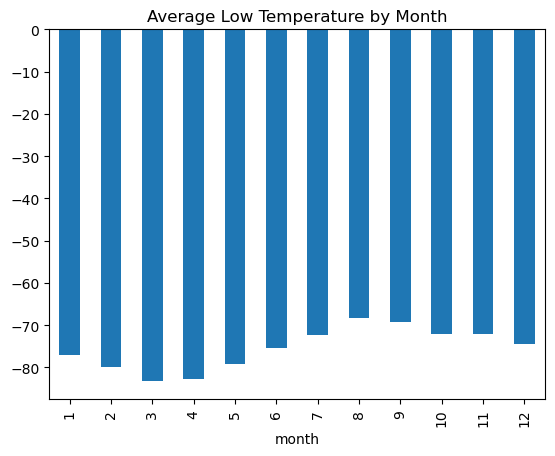

In [33]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Plot the average low temperature by month
avg_low_temp.plot(kind='bar', title='Average Low Temperature by Month')

# Show the plot
plt.show()

In [34]:
# Identify the coldest and hottest months in Curiosity's location
# Calculate the average low temperature by month
avg_low_temp = df.groupby('month')['min_temp'].mean()

# Find the coldest month
coldest_month = avg_low_temp.idxmin()
print(f"The coldest month on Mars is: {coldest_month}")

# Find the warmest month
warmest_month = avg_low_temp.idxmax()
print(f"The warmest month on Mars is: {warmest_month}")

The coldest month on Mars is: 3
The warmest month on Mars is: 8


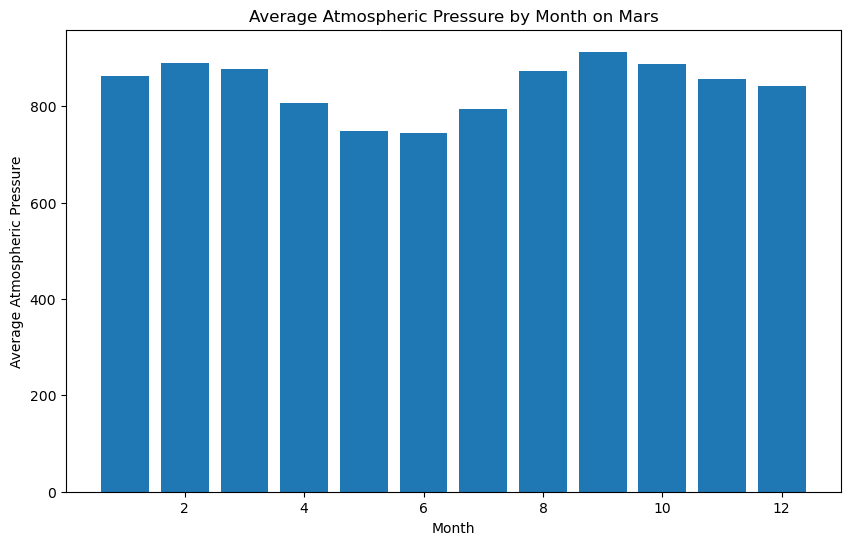

The month with the lowest average atmospheric pressure on Mars is: 6
The month with the highest average atmospheric pressure on Mars is: 9


In [37]:
# 4. Average pressure by Martian month
import matplotlib.pyplot as plt

# Group by 'month' and calculate the average of 'pressure'
avg_pressure = df.groupby('month')['pressure'].mean()

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(avg_pressure.index, avg_pressure.values)
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.title('Average Atmospheric Pressure by Month on Mars')
plt.show()

# Find the month with the lowest average atmospheric pressure
lowest_pressure_month = avg_pressure.idxmin()
print(f"The month with the lowest average atmospheric pressure on Mars is: {lowest_pressure_month}")

# Find the month with the highest average atmospheric pressure
highest_pressure_month = avg_pressure.idxmax()
print(f"The month with the highest average atmospheric pressure on Mars is: {highest_pressure_month}")

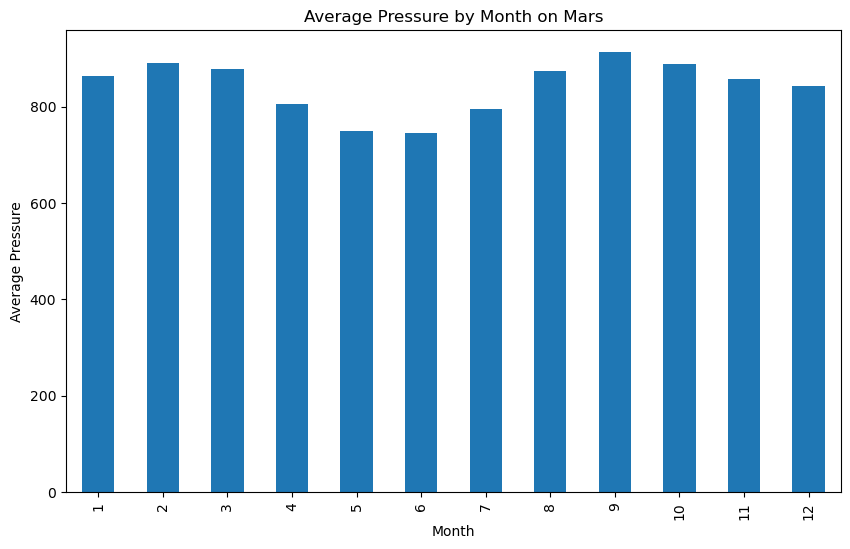

In [38]:
# Plot the average pressure by month
# Assuming 'df' is the  DataFrame and it has been defined and processed correctly

# Calculate the average pressure by month
avg_pressure = df.groupby('month')['pressure'].mean()

# Plot the results
avg_pressure.plot(kind='bar', figsize=(10, 6), title='Average Pressure by Month on Mars')

# Show the plot
plt.xlabel('Month')
plt.ylabel('Average Pressure')
plt.show()

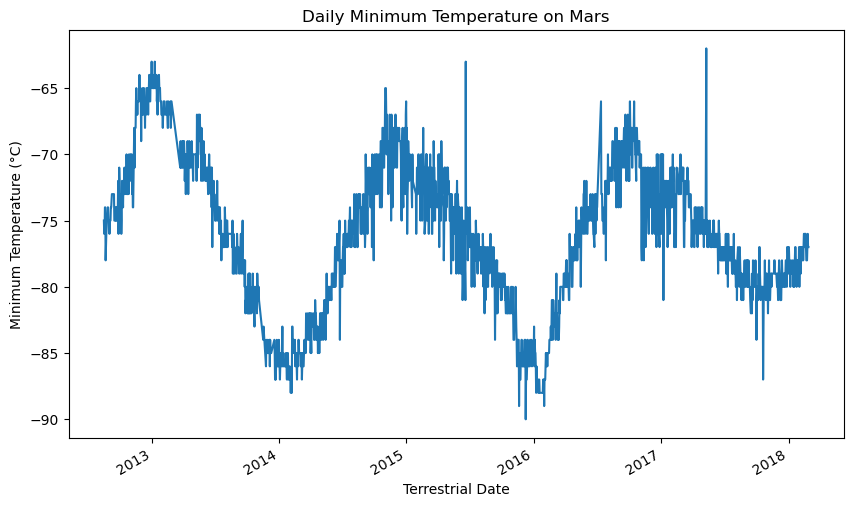

In [39]:
# 5. How many terrestrial (earth) days are there in a Martian year?
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it has been defined and processed correctly

# Convert 'terrestrial_date' to datetime if it's not already
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Set 'terrestrial_date' as the index
df.set_index('terrestrial_date', inplace=True)

# Plot the daily minimum temperature
df['min_temp'].plot(kind='line', figsize=(10, 6))

plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [40]:
# Write the data to a CSV

# Write the DataFrame to a CSV file
df.to_csv('mars_weather.csv', index=False)

In [41]:
browser.quit()